In [94]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.optimizers import Adam,RMSprop,SGD,Adamax,Adagrad,Adadelta,Nadam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('health_vitals_data.csv')

# Separate features and target variable
X = df.drop(columns=['Fitness Score'])
y = df['Fitness Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Preprocess categorical columns (like 'Gender') using one-hot encoding
categorical_cols = ['Gender']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # Build the Neural Network model
# model = keras.Sequential([
#     keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(1)  # Output layer with a single neuron for regression
# ])
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=180, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test).flatten()


Epoch 1/180
8/8 [==============================] - 2s 24ms/step - loss: 0.0079 - val_loss: 0.0043
Epoch 2/180
8/8 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 3/180
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/180
8/8 [==============================] - 0s 7ms/step - loss: 7.7888e-04 - val_loss: 7.3584e-04
Epoch 5/180
8/8 [==============================] - 0s 8ms/step - loss: 5.2127e-04 - val_loss: 5.0295e-04
Epoch 6/180
8/8 [==============================] - 0s 7ms/step - loss: 3.7930e-04 - val_loss: 3.7368e-04
Epoch 7/180
8/8 [==============================] - 0s 7ms/step - loss: 3.2594e-04 - val_loss: 2.8362e-04
Epoch 8/180
8/8 [==============================] - 0s 8ms/step - loss: 2.4856e-04 - val_loss: 2.4785e-04
Epoch 9/180
8/8 [==============================] - 0s 8ms/step - loss: 2.2125e-04 - val_loss: 2.1186e-04
Epoch 10/180
8/8 [==============================] - 0s 10ms/step - loss: 1.781

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 4.4203324458267115e-06
R-squared (R2) Score: 0.9997864689547209
Mean Absolute Error (MAE): 0.0013963838956133564
Root Mean Squared Error (RMSE): 0.002102458666853337


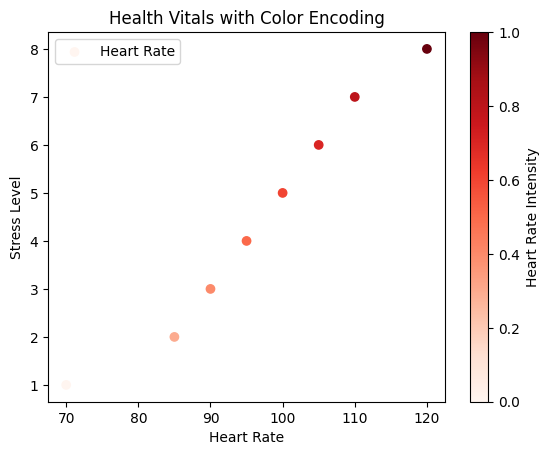

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for health vitals (you can replace these arrays with your actual data)
heart_rate = np.array([70, 85, 90, 95, 100, 105, 110, 120])
stress_level = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis', etc.)
colormap = 'Reds'

# Normalize the intensity values between 0 and 1
heart_rate_norm = (heart_rate - heart_rate.min()) / (heart_rate.max() - heart_rate.min())
stress_level_norm = (stress_level - stress_level.min()) / (stress_level.max() - stress_level.min())

# Plot the health vitals with color encoding
plt.scatter(heart_rate, stress_level, c=heart_rate_norm, cmap=colormap, label='Heart Rate')
plt.colorbar(label='Heart Rate Intensity')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.title('Health Vitals with Color Encoding')
plt.legend()
plt.show()
